HMM Forward Algorithm Probabilities:
        Sunny    Cloudy     Rainy
t=0  0.333333  0.223333  0.110000
t=1  0.000000  0.103642  0.105212
t=2  0.068922  0.070145  0.011287


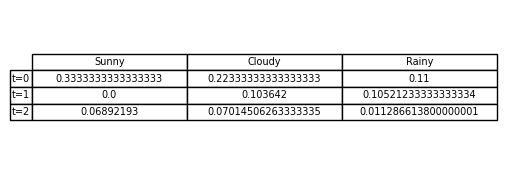

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given transition probabilities (From -> To)
transition_probs = np.array([
    [0.25, 0.50, 0.25],  # Sunny -> [Sunny, Cloudy, Rainy]
    [0.33, 0.33, 0.33],  # Cloudy -> [Sunny, Cloudy, Rainy]
    [0.33, 0.67, 0.00]   # Rainy -> [Sunny, Cloudy, Rainy]
])

# Given emission probabilities (Weather -> Behavior)
emission_probs = np.array([
    [1.0, 0.0],  # Sunny -> [Walk, Umbrella]
    [0.67, 0.33],  # Cloudy -> [Walk, Umbrella]
    [0.33, 0.67]   # Rainy -> [Walk, Umbrella]
])

# Define states and observations
states = ["Sunny", "Cloudy", "Rainy"]
observations = ["Walk", "Umbrella"]
num_states = len(states)

# Assume uniform initial probabilities
initial_probs = np.array([1/3, 1/3, 1/3])

# Observation sequence: Walk -> Umbrella -> Walk
obs_sequence = [0, 1, 0]  # Corresponding indices in `observations`

# Forward Algorithm
T = len(obs_sequence)
alpha = np.zeros((T, num_states))

# Initialization
alpha[0, :] = initial_probs * emission_probs[:, obs_sequence[0]]

# Recursion
for t in range(1, T):
    for j in range(num_states):
        alpha[t, j] = np.sum(alpha[t - 1, :] * transition_probs[:, j]) * emission_probs[j, obs_sequence[t]]

# Convert to DataFrame for display
df_alpha = pd.DataFrame(alpha, columns=states, index=[f"t={t}" for t in range(T)])

# Print the computed forward probabilities
print("HMM Forward Algorithm Probabilities:")
print(df_alpha)

# Plot the table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_alpha.values, colLabels=df_alpha.columns, rowLabels=df_alpha.index, cellLoc='center', loc='center')

# Show the table
plt.show()

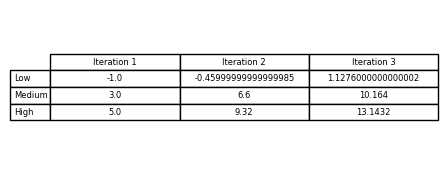

In [8]:
# Define the MDP parameters
states = ["L", "M", "H"]  # Low, Medium, High Wealth
actions = ["C", "A"]  # Conservative, Aggressive

gamma = 0.9  # Discount factor

# Transition probabilities: P(s' | s, a)
transition_probs = {
    "L": {"C": {"L": 0.8, "M": 0.2}, "A": {"L": 0.6, "M": 0.4}},
    "M": {"C": {"M": 0.7, "H": 0.3}, "A": {"M": 0.5, "H": 0.5}},
    "H": {"C": {"H": 0.9, "M": 0.1}, "A": {"H": 0.7, "M": 0.3}}
}

# Rewards
rewards = {"L": -1, "M": 3, "H": 5}

# Initialize value function and policy
V = {"L": 0, "M": 0, "H": 0}
policy = {"L": None, "M": None, "H": None}

# Number of iterations
iterations = 3
value_history = []

# Value Iteration Process
for i in range(iterations):
    new_V = {}
    for s in V.keys():
        action_values = {}
        for a in actions:
            expected_value = sum(
                transition_probs[s][a][s_prime] * V[s_prime] for s_prime in transition_probs[s][a]
            )
            action_values[a] = rewards[s] + gamma * expected_value
        # Update the value function with the best action's value
        new_V[s] = max(action_values.values())
        # Store the best action (policy update)
        policy[s] = max(action_values, key=action_values.get)
    
    V = new_V
    value_history.append(V.copy())

# Data for the table (Value Iteration results)
data = {
    "Iteration 1": [value_history[0]["L"], value_history[0]["M"], value_history[0]["H"]],
    "Iteration 2": [value_history[1]["L"], value_history[1]["M"], value_history[1]["H"]],
    "Iteration 3": [value_history[2]["L"], value_history[2]["M"], value_history[2]["H"]],
}

# Create DataFrame
df_table = pd.DataFrame(data, index=["Low", "Medium", "High"])

# Plot table
fig, ax = plt.subplots(figsize=(5, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_table.values, colLabels=df_table.columns, rowLabels=df_table.index, cellLoc='center', loc='center')

# Show the table
plt.show()